In [46]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [47]:
import seaborn as sns, pandas as pd, numpy as np


In [48]:
### BEGIN SOLUTION
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Human_Activity_Recognition_Using_Smartphones_Data.csv", sep=',')

data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [49]:
data.dtypes.value_counts()

float64    561
object       1
Name: count, dtype: int64

In [50]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

In [51]:
data.iloc[:, :-1].min().value_counts()

-1.0    561
Name: count, dtype: int64

In [52]:
data.iloc[:, :-1].max().value_counts()

1.0    561
Name: count, dtype: int64

In [53]:
data.Activity.value_counts()

Activity
LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: count, dtype: int64

In [54]:
from sklearn.preprocessing import LabelEncoder


La variable objetivo necesita estar encoder

In [55]:
le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)

10145    1
1445     4
7575     0
3107     1
8574     2
Name: Activity, dtype: int64

In [56]:
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

In [57]:
tril_index = np.tril_indices_from(corr_values)
tril_index

(array([  0,   1,   1, ..., 560, 560, 560]),
 array([  0,   0,   1, ..., 558, 559, 560]))

In [58]:
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.nan

In [59]:
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1': 'feature2',
                                0:'correlation'}))

In [60]:
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

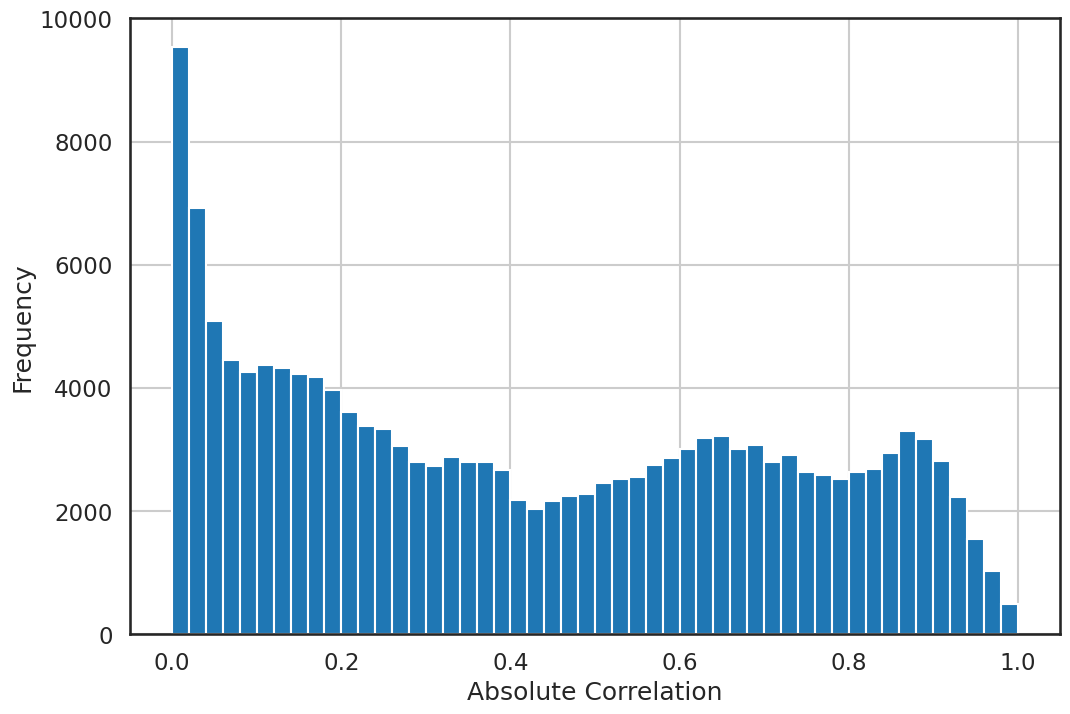

In [62]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');
plt.show()

In [63]:
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>.8')

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


In [64]:
from sklearn.model_selection import StratifiedShuffleSplit


In [65]:
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,
                                          test_size=0.3,
                                          random_state=42)

In [66]:
train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

In [67]:
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'Activity']

In [68]:
y_train.value_counts(normalize=True)

Activity
0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: proportion, dtype: float64

In [69]:
y_test.value_counts(normalize=True)


Activity
0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: proportion, dtype: float64

In [70]:
from sklearn.linear_model import LogisticRegression


solver = `liblinear`: Adecuado para conjunto de datos pequeños  o cuando se unsa regularización L1 (lasso), resuleve problemas de optimización usando método de "descenso de grandiente"

- 'newton-cg': para problemas más grandes y con regularización L2.
- 'lbfgs': similar a 'newton-cg', pero más eficiente para datos grandes.
- 'sag' y 'saga': para grandes cantidades de datos y soportan tanto L1 como L2.

En este caso, liblinear es rápido y funciona bien para conjuntos de datos pequeños o medianos.

In [71]:
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [72]:
from sklearn.linear_model import LogisticRegressionCV


Cs = 10, especifica el número de valores diferentes de la constante de regularización C que evaluara durante la validación cruzada. 

cv = 4 validación cruzada de 4 particiones

In [73]:
lr_l1 = LogisticRegressionCV(Cs=10, cv=4,
                              penalty='l1', solver='liblinear').fit(X_train, y_train)

In [74]:
lr_l2 = LogisticRegressionCV(Cs=10, cv=4,
                             penalty='l2', solver='liblinear').fit(X_train, y_train)

In [75]:
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

In [76]:
for lab, mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]],
                                codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr                                                          l1  \
            0         1         2         3         4         5         0   
332 -0.006886  0.188199  0.113870 -0.132580  0.100317 -0.192501 -0.054351   
495  0.008565  0.217952  0.309497  0.123140  0.198157  0.059359  0.000000   
348 -0.064602 -0.190042 -0.395608  0.462112 -0.247030 -0.266495 -0.035504   
320 -0.010244  0.168141  0.140611  0.039110  0.126100 -0.167563 -0.007480   
193 -0.029849  0.902269 -0.846995 -1.016444 -0.625240  1.617627  0.000000   
225  0.067467  0.163853 -0.348613 -0.395370  0.056091  0.483722  0.427158   
231 -0.061735 -0.201630 -0.382630  0.267973 -0.175102 -0.176351  0.000000   
12  -0.057144  0.466800  0.158404 -0.112619  0.892966 -0.742814 -0.170402   
44   0.037604  0.203505  0.741451  0.217585  0.086828  0.004395  0.000000   
533  0.000644 -0.005133  0.013410 -0.362793  0.154670 -0.385035 -0.059526   

                                                             l2            \
            1         2         3         4         5         0         1   
332  0.000000  0.000000 -0.057307  0.155619  0.000000 -0.032630  0.700169   
495  0.169849  0.750748  0.061273  1.630908  0.164201 -0.003973  0.442716   
348  0.000000 -0.103232  0.904599 -0.094830 -1.155264 -0.110563 -0.730799   
320  0.000000  0.000000  0.112486  0.054425 -0.102884 -0.035193  0.634394   
193  1.834753 -2.021947 -3.062934 -1.011073  5.764269 -0.090747  4.827597   
225  0.000000 -0.566534 -2.724897  0.000000  1.139353  0.157606  0.467380   
231  0.000000  0.000000  0.514789  0.000000 -0.142225 -0.103299 -0.511707   
12   0.645499  0.000000 -1.267534  2.704495 -2.063256 -0.100464  2.419113   
44   0.471866  1.689691  0.212117  0.043911  0.451133  0.069605 -0.186100   
533  0.000000  0.000000 -1.241923  0.148856 -1.021416  0.010137 -0.109228   

                                             
            2         3         4         5  
332  0.126403 -0.226633  0.053356 -0.610408  
495  0.439219 -0.011687  0.398539 -0.063397  
348 -0.559324  0.886836 -0.376743 -0.471471  
320  0.171202  0.076791  0.300306 -0.493717  
193 -1.507667 -2.690339 -1.199014  3.897856  
225 -0.384272 -0.974116  0.046660  1.113874  
231 -0.536821  0.571581 -0.405967 -0.361811  
12   0.163489 -0.694492  1.823116 -1.831623  
44   1.112165  0.761398  0.240336 -0.213636  
533  0.024587 -1.156037  0.305459 -0.822443

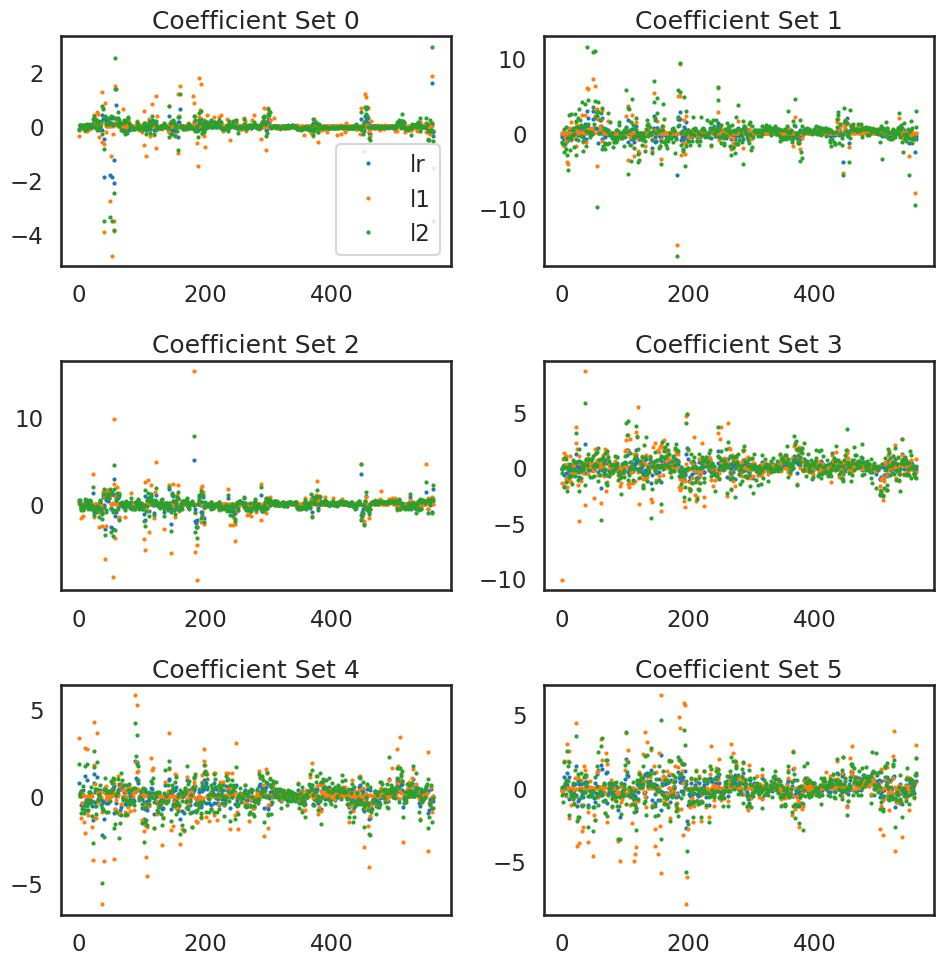

In [77]:

fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()
plt.show()
### END SOLUTION

In [93]:
### BEGIN SOLUTION
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

In [94]:
for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


In [95]:
y_prob.head()


,lr,l1,l2
0,0.998939,0.998938,0.999757
1,0.988165,0.999642,0.999489
2,0.987592,0.995500,0.999657
3,0.981381,0.999193,0.994339
4,0.998277,0.999920,0.999997


In [96]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize


In [97]:
metrics = list()
cm = dict()

In [98]:
for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [99]:
metrics

,lr,l1,l2
precision,0.984144,0.983835,0.983824
recall,0.984142,0.983819,0.983819
fscore,0.984143,0.983815,0.983819
accuracy,0.984142,0.983819,0.983819
auc,0.990384,0.990144,0.990165


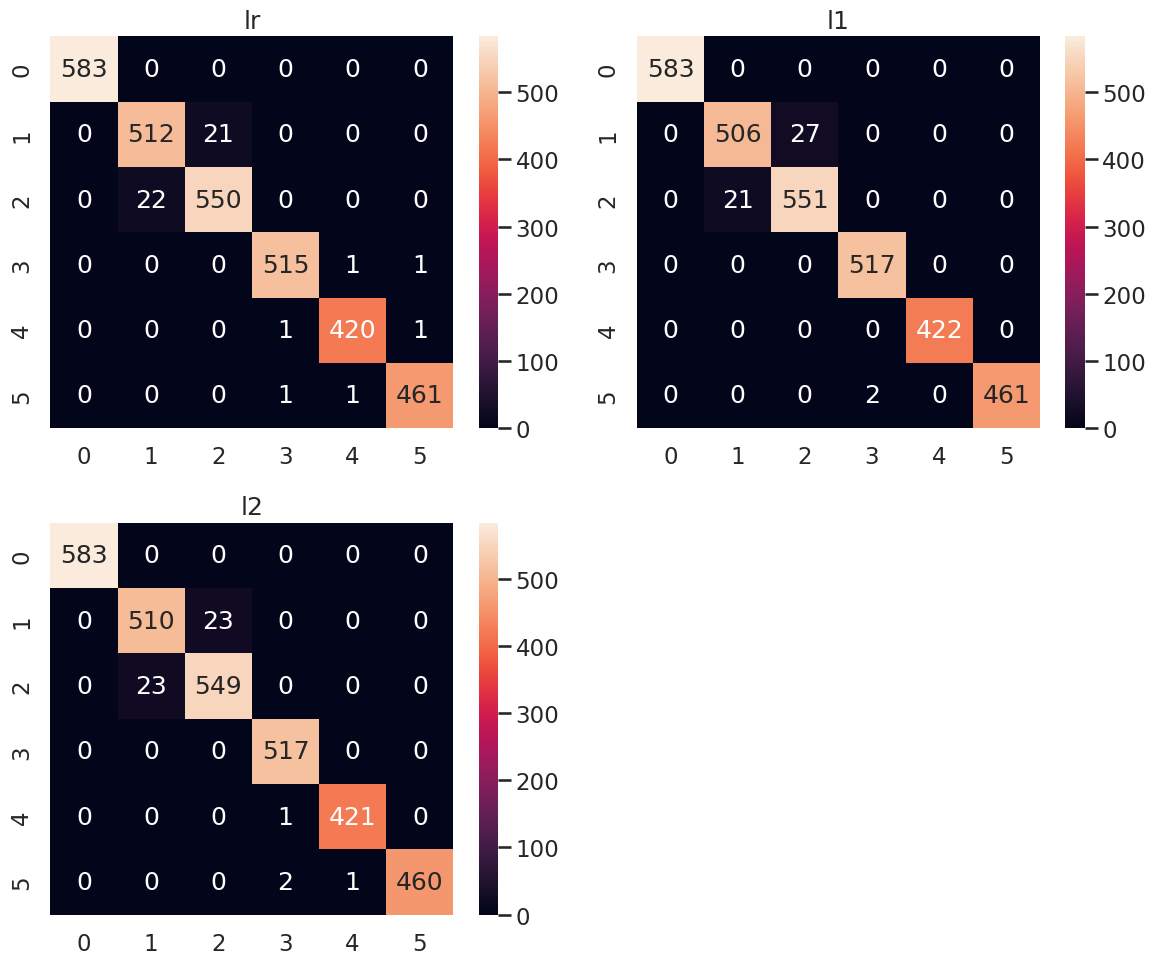

In [100]:
### BEGIN SOLUTION
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()
plt.show()
### END SOLUTION